In [ ]:
from judge import is_point_in_polyhedron
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt



# example for a CUBE

In [ ]:

point1 = [1, 1, 1]
vertices = [
    [0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0],
    [0, 0, 2], [2, 0, 2], [2, 2, 2], [0, 2, 2]
]

faces = [
    [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
    [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
]
# Faces are defined by the indices of the vertices

point2 = [1, 1, 3]

print(is_point_in_polyhedron(point1, vertices, faces))  
print(is_point_in_polyhedron(point2, vertices, faces))

# Example for a Square frustum

In [15]:

# Vertices are defined by their coordinates
vertices = [
    [0, 0, 0],  # Bottom Vertices
    [2, 0, 0],
    [2, 2, 0],
    [0, 2, 0],
    [0.5, 0.5, 2],   # Top Vertices
    [0.5, 1.5, 2],
    [1.5, 1.5, 2],
    [1.5, 0.5, 2]
    
]

# Similar to the cube, faces are defined by the indices of the vertices
faces = [
    [0, 1, 2, 3],  # Bottom face
    [4, 5, 6, 7],  # Top face
    [0, 1, 7, 4],  # Side faces
    [1, 2, 6, 7],
    [2, 3, 5, 6],
    [3, 0, 4, 5]
]

print(vertices)
print(faces)

[[0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0], [0.5, 0.5, 2], [0.5, 1.5, 2], [1.5, 1.5, 2], [1.5, 0.5, 2]]
[[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 7, 4], [1, 2, 6, 7], [2, 3, 5, 6], [3, 0, 4, 5]]


(False, 0)


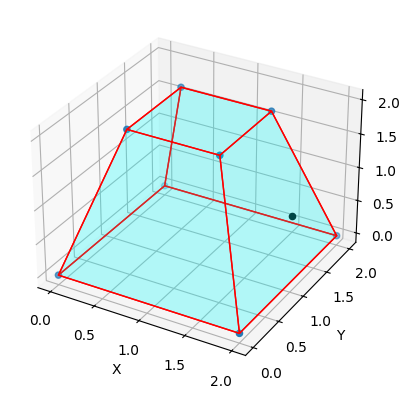

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制顶点
vertices_array = np.array(vertices)
ax.scatter(vertices_array[:, 0], vertices_array[:, 1], vertices_array[:, 2])

# 绘制面
poly3d = [[vertices[vert_id] for vert_id in face] for face in faces]
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.15))
print(is_point_in_polyhedron([1, 2, 1], vertices, faces))
ax.scatter(2, 1, 1, c='black', marker='o')
# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

(False, 2)